In [6]:
base_dir = "C:/Users/Dell/Downloads/Knee_Osteoarthritis_Predictor-main/Knee_Osteoarthritis_Predictor-main/Model_Training/Data"
train_dir = os.path.join(base_dir, 'train')

test_dir = os.path.join(base_dir, 'test')

In [2]:
pip install keras_preprocessing

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load

from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization


In [4]:
pip install keras_preprocessing


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


In [7]:
batch_size = 10
epochs = 6
img_height = 224
img_width = 224

In [8]:
 1574 + 737

2311

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [10]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [9]:
from keras.applications import InceptionResNetV2

base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


In [10]:
base_model.trainable = False

In [11]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_norm

In [12]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(5,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 38400)             0         
                                                                 
 dense (Dense)               (None, 5)                 192005    
                                                                 
Total params: 54528741 (208.01 MB)
Trainable params: 192005 (750.02 KB)
Non-trainable params: 54336736 (207.28 MB)
_________________________________________________________________


In [14]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = classifier.fit(train_data_gen, epochs=10,
validation_data= val_data_gen,)

Epoch 1/10


165/165 [==============================] - 316s 2s/step - loss: 6.6708 - accuracy: 0.4673 - val_loss: 3.5143 - val_accuracy: 0.6115
Epoch 2/10
165/165 [==============================] - 327s 2s/step - loss: 2.4496 - accuracy: 0.6855 - val_loss: 2.1379 - val_accuracy: 0.7315
Epoch 3/10
165/165 [==============================] - 298s 2s/step - loss: 2.5333 - accuracy: 0.7315 - val_loss: 0.9188 - val_accuracy: 0.8473
Epoch 4/10
165/165 [==============================] - 305s 2s/step - loss: 1.3433 - accuracy: 0.8218 - val_loss: 1.5157 - val_accuracy: 0.7988
Epoch 5/10
165/165 [==============================] - 339s 2s/step - loss: 1.1678 - accuracy: 0.8230 - val_loss: 0.6670 - val_accuracy: 0.8891
Epoch 6/10
165/165 [==============================] - 315s 2s/step - loss: 1.3071 - accuracy: 0.8400 - val_loss: 0.4422 - val_accuracy: 0.9200
Epoch 7/10
165/165 [==============================] - 291s 2s/step - loss: 0.5562 - accuracy: 0.9139 - val_loss: 1.1092 - val_accuracy: 0.85

In [16]:
model_save_loc="D:/final/trained model/InceptionResNet.h5"
classifier.save(model_save_loc)

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
#classifier.save('knee.h5')

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
#pip install Pillow

In [17]:
import numpy as np

In [18]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= classifier.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

165/165 - 147s - 147s/epoch - 890ms/step


In [19]:
import matplotlib.pyplot as plt

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [22]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

Confusion matrix, without normalization
[[497   4   2   0   0]
 [ 46 440   0   0   2]
 [  6   4 217   1   4]
 [  0   4   1 215   1]
 [  1   1   0   0 204]]
Accuracy: 0.953
Precision: 0.976
Recall: 0.953
F-Measure: 0.953


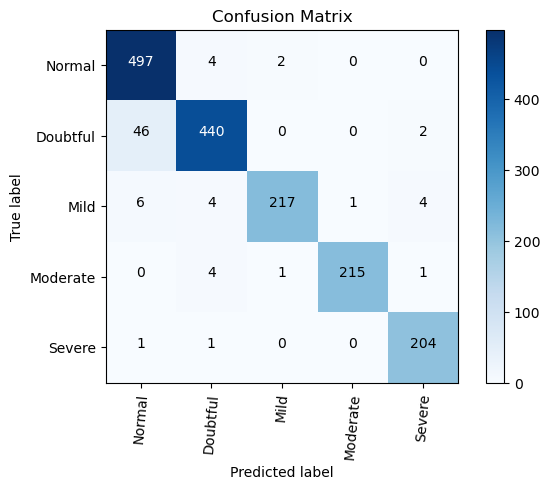

In [23]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((224,224))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = classifier.predict_classes(X_test)
    return image,Y_pred
  

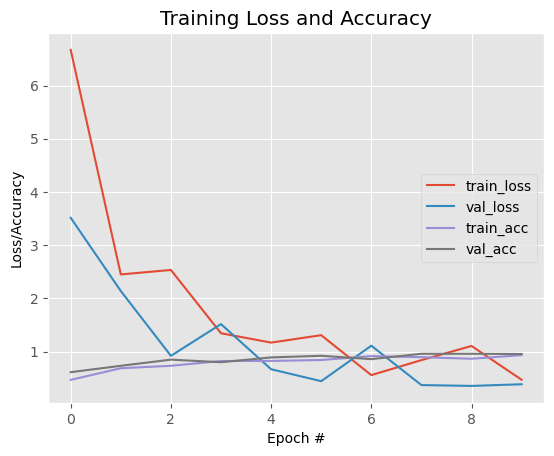

In [25]:
# plot the training loss and accuracy
N = 10 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [9]:
import tensorflow as tf

class CustomScaleLayer(tf.keras.layers.Layer):
    def __init__(self, scale_factor, **kwargs):
        super(CustomScaleLayer, self).__init__(**kwargs)
        self.scale_factor = scale_factor

    def call(self, inputs):
        return inputs * self.scale_factor

    def get_config(self):
        config = super(CustomScaleLayer, self).get_config()
        config.update({'scale_factor': self.scale_factor})
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)
